In [1]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 

# Generate some data ... 3000 samples chosen from a Gaussian distribution with a mean of 100 and a sigma of 10.
npts = 30
mu = 100.0
sigma = 10.0
x = stats.norm.rvs(size=npts,loc=mu+2.0,scale=sigma)

# calculate the sample mean, and the sample standard deviation (unbiased).
xbar = np.mean(x)
stdev = np.std(x,ddof=1)

Let us return now to the notion of uncertainty.  We noted above that we can easily calculate the mean value
of a sample of data.  The question is, then, how certain are we that this sample mean agrees with the population
mean.  In other words, how close should xbar be to mu?

The answer is: the quoted uncertainty in the mean depends on whether or not we know what $\sigma$ is.

If we know what $\sigma$ is, then the uncertainty in the mean is $\frac{\sigma}{\sqrt{N}}$

If we do NOT know what sigma is, then the uncertainty in the mean is $\frac{S}{\sqrt{N}}$.  Recall that $S$ is our ESTIMATE of $\sigma$ from the data sample.

In [2]:
delta_mu_known = sigma / np.sqrt(npts)
delta_mu_unknown = stdev / np.sqrt(npts)

print ("Estimate (known sigma) of mu: ", xbar, "+/-",delta_mu_known)
print ("Estimate (unknown sigma) of mu: ", xbar, "+/-",delta_mu_unknown)

Estimate (known sigma) of mu:  104.30916124961537 +/- 1.8257418583505538
Estimate (unknown sigma) of mu:  104.30916124961537 +/- 1.6999591388544748


In [3]:
# Let's reformat that output, so that it better reflects the uncertainties!!!

print ("Estimate (known sigma) of mu: %.2f +/- %.2f" % (xbar,delta_mu_known))
print ("Estimate (unknown sigma) of mu: %.2f +/- %.2f" % (xbar,delta_mu_unknown))

Estimate (known sigma) of mu: 104.31 +/- 1.83
Estimate (unknown sigma) of mu: 104.31 +/- 1.70


Notes:

1. Our estimate of the mean ($\bar{x}$) appears to overlap with the population mean ($\mu$) within the quoted uncertainty.
2. When we do not know sigma, and have to esimate it from the data, the uncertainty in the mean increases.


There is a lot more to this story, though!

Let's think about what these results could be saying, or moreover what the result of any experiment can tell us.
There are actually only four possiblities:

1.  The population mean really is what we think it is (100.0), and we have sampled from it in an 
    unbiased way, because of good experiment design, and our results are in agreement with what     
    we think the population mean is.  Life is good!
    
2.  The population mean really is what we think it is (100.0), and we have sampled from it in an 
    unbiased way, because of good experiment design, but unfortunately we just got unlucky, and
    because of the random nature of sampling, our results indicate a disagreement, and tell us that
    maybe the population mean isn't what we think it is.  This is known in statistics as TYPE I ERROR.
    
3.  The population mean is different from what we think it is, and and we have sampled from it in an 
    unbiased way, because of good experiment design.  Our results are consistent with the population
    mean being different from what we thought it was, and we have discovered this disagreement.  Again,
    life is good!
    
4.  The population mean is different from what we think it is, and and we have sampled from it in an 
    unbiased way, because of good experiment design.  However, our results are consistent with the
    population being what we originally thought it was (100.0).  Thus, we have not uncovered the problem
    that actually exists.  In other words, we again got "unlucky", because of random sampling. This is known
    as a TYPE II ERROR.

In order to make appropriate calculations and comparisons, we will define a new variable, $z$, defined as:

$z = \frac{x-\mu}{\sigma}$

In the case where one samples from a Gaussian distribution, the $z$ distribution will be a Gaussian distribution with a mean value of 0 and a standard deviation of 1.  Thus, the $z$ distribution will be THE SAME, irrespective of the specific values of $\mu$ and $\sigma$ in the experiment.

In [4]:
z = (x-mu)/sigma

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 2., 0., 0.,
        2., 0., 2., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2.,
        0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([-1.83448952, -1.79240264, -1.75031576, -1.70822888, -1.66614199,
        -1.62405511, -1.58196823, -1.53988135, -1.49779446, -1.45570758,
        -1.4136207 , -1.37153382, -1.32944694, -1.28736005, -1.24527317,
        -1.20318629, -1.16109941, -1.11901252, -1.07692564, -1.03483876,
        -0.99275188, -0.95066499, -0.90857811, -0.86649123, -0.82440435,
        -0.78231747, -0.74023058, -0.6981437 , -0.65605682, -0.61396994,
        -0.57188305, -0.52979617, -0.48770929, -0.44562241, -0.40353553,
        -0.36144864, -0.31936176, -0.27

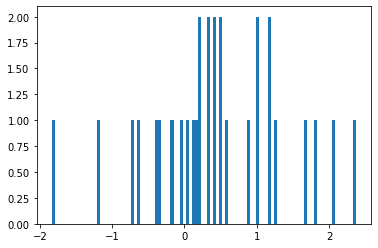

In [5]:
nbins = 100
plt.hist(z,bins=nbins)

Question:  What is the probability that for a single measurement of x, that we get a value that is within $\pm \sigma$ of $\mu$?

Answer:  It is the integrated probability between $z = -1$ and $z=1$.  As the $z$ distribution is well known, this is easily calculable!

In [6]:
# Get the integral from -infinity to -1.0
#
# We will use the cdf method (Cumulative Distribution Function) for the standardized normal/Gaussian distribution
# (i.e. the z distribution) within
# the scipy.stats package.  The cumulative distribution function is DEFINED to give the integral of the distribution
# from -infinity up to the specified value.

integral_minus = stats.norm.cdf(-1.0)
# Get the integral from -infinity to 1.0
integral_plus = stats.norm.cdf(1.0)

print(integral_plus,integral_minus)

# Calculate the integral between the two limits
integral_between = integral_plus - integral_minus

print(integral_between)

print("This means that there is about a 68% probability of measusing a value in the interval.")

0.8413447460685429 0.15865525393145707
0.6826894921370859
This means that there is about a 68% probability of measusing a value in the interval.


In [7]:
integral_minus = stats.norm.cdf(-2.0)
integral_plus = stats.norm.cdf(2.0)

print(integral_plus,integral_minus)

integral_between = integral_plus - integral_minus

print(integral_between)

print("This means that there is about a 95% probability of measusing a value in the interval.")

0.9772498680518208 0.022750131948179195
0.9544997361036416
This means that there is about a 95% probability of measusing a value in the interval.


In [8]:
integral_minus = stats.norm.cdf(-3.0)
integral_plus = stats.norm.cdf(3.0)

print(integral_plus,integral_minus)

integral_between = integral_plus - integral_minus

print(integral_between)

print("This means that there is about a 99.7% probability of measusing a value in the interval.")

0.9986501019683699 0.0013498980316300933
0.9973002039367398
This means that there is about a 99.7% probability of measusing a value in the interval.


In [9]:
integral_minus = stats.norm.cdf(-6.0)
integral_plus = stats.norm.cdf(6.0)

print(integral_plus,integral_minus)

integral_between = integral_plus - integral_minus

print(integral_between)

print("This means that there is about a 99.9999998% probability of measusing a value in the interval.")

print ("In other words, there is 0.0000002% probability, or 1 chance in 500,000,000 of getting a value outside of these limits.")

0.9999999990134123 9.865876450376946e-10
0.9999999980268246
This means that there is about a 99.9999998% probability of measusing a value in the interval.
In other words, there is 0.0000002% probability, or 1 chance in 500,000,000 of getting a value outside of these limits.


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 81.65510477,  82.0759736 ,  82.49684242,  82.91771124,
         83.33858006,  83.75944889,  84.18031771,  84.60118653,
         85.02205535,  85.44292418,  85.863793  ,  86.28466182,
         86.70553065,  87.12639947,  87.54726829,  87.96813711,
         88.38900594,  88.80987476,  89.23074358,  89.6516124 ,
         90.07248123,  90.49335005,  90.91421887,  91.3350877 ,
         91.75595652,  92.17682534,  92.59769416,  93.01856299,
         93.43943181,  93.86030063,  94.28116946,  94.70203828,
         95.1229071 ,  95.54377592,  9

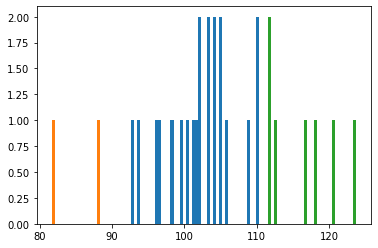

In [10]:
xlow = x[(x<(mu-sigma))]
xhigh = x[(x>(mu+sigma))]

bins=np.histogram(np.hstack((x,xlow,xhigh)), bins=nbins)[1] #get the bin edges

plt.hist(x,bins)
plt.hist(xlow,bins)
plt.hist(xhigh,bins)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 81.65510477,  82.0759736 ,  82.49684242,  82.91771124,
         83.33858006,  83.75944889,  84.18031771,  84.60118653,
         85.02205535,  85.44292418,  85.863793  ,  86.28466182,
         86.70553065,  87.12639947,  87.54726829,  87.96813711,
         88.38900594,  88.80987476,  89.23074358,  89.6516124 ,
         90.07248123,  90.49335005,  90.91421887,  91.3350877 ,
         91.75595652,  92.17682534,  92.59769416,  93.01856299,
         93.43943181,  93.86030063,  94.28116946,  94.70203828,
         95.1229071 ,  95.54377592,  9

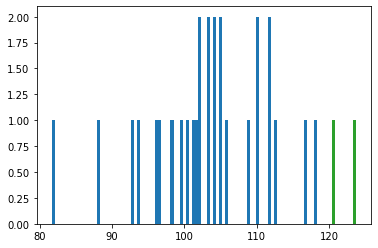

In [11]:
xlow = x[(x<(mu-2.0*sigma))]
xhigh = x[(x>(mu+2.0*sigma))]

bins=np.histogram(np.hstack((x,xlow,xhigh)), bins=nbins)[1] #get the bin edges

plt.hist(x,bins)
plt.hist(xlow,bins)
plt.hist(xhigh,bins)


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 81.65510477,  82.0759736 ,  82.49684242,  82.91771124,
         83.33858006,  83.75944889,  84.18031771,  84.60118653,
         85.02205535,  85.44292418,  85.863793  ,  86.28466182,
         86.70553065,  87.12639947,  87.54726829,  87.96813711,
         88.38900594,  88.80987476,  89.23074358,  89.6516124 ,
         90.07248123,  90.49335005,  90.91421887,  91.3350877 ,
         91.75595652,  92.17682534,  92.59769416,  93.01856299,
         93.43943181,  93.86030063,  94.28116946,  94.70203828,
         95.1229071 ,  95.54377592,  9

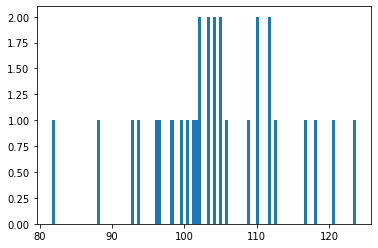

In [12]:
xlow = x[(x<(mu-3.0*sigma))]
xhigh = x[(x>(mu+3.0*sigma))]

bins=np.histogram(np.hstack((x,xlow,xhigh)), bins=nbins)[1] #get the bin edges

plt.hist(x,bins)
plt.hist(xlow,bins)
plt.hist(xhigh,bins)

Now, we will ask a different question:  What is the z-distribution associated with the MEAN of the original data distribution?

Note that in our definition of $z$ above, we are comparing an individual data point ($x_i$) with the population mean ($\mu$), and the dividing that quantity by $\sigma$, which is representative of the "width" of the distribution.

For the z-distribution associated with the MEAN of the data distribution, we will define $z$ similarly:

$z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{N}}} $

As you can see, we will compare the $sample$ mean ($\bar{x}$) to the population mean ($\mu$), and then divide by the uncertainty in the sample mean ($\frac{\sigma}{\sqrt{N}}$).



In [13]:
sem = sigma/np.sqrt(npts)
zscore = (xbar-mu)/sem

print ("Z score = ",zscore)

Z score =  2.3602248203414886


So, what does this mean?  Well, it means that the sample mean that we measured ($\bar{x}$) is lower than the predicted mean ($\mu$) by a small amount (0.90 x the predicted uncertainty).

The fundamental question is:  is this difference enough to matter?  Is there a problem?  In order to answer these questions, there are several things that we have to ask ourselves first:

1.  What question are we asking?  There are three possibilities:

(i) Are the data consistent with ${\bar x} = \mu$?

(ii) Are the data consistent with ${\bar x} \ge \mu$?

(iii) Are the data consistent with ${\bar x} \le \mu$?


2.  How large must the deviation between $\bar{x}$ and $\mu$ be before we say that there is a problem?  This approach is known as the 'null hypothesis" approach.  We assume that there is no problem, and then look for evidence that there is a problem.

The level of required deviation that we require in order to report that there is a problem (i.e. we REJECT the null hypothesis) is known as the TYPE I ERROR PROBABILITY, $\alpha$.

Essentially, the probability $\alpha$ is this: it is the probability that there is NOT a problem (i.e. $\mu$ really is what we think it is) but we just got unlucky, statistically, and measured a value of $\bar{x}$ that indicates that $\mu$ is different than what we think it is.

Let us consider the three cases noted above:

Case 1:  

We assume that we are sampling from a population that is consistent with our expected value of $\mu$. In this instance, there is a probability $\frac{\alpha}{2}$ that we will measure a value of $z$ that is greater
than some critical value, and a probability $\frac{\alpha}{2}$ that we will measure a value of $z$ that is lower
than some critical value.

In order to understand this, imagine doing the experiment many times.  Each time, we sample a certain number of points from the distribution, and we can calculate a value of $\bar{x}$ for that sample.  We can also calculate
a value of $z$ for that value of $\bar{x}$.  If we then look at the distribution of $z$ values, we expect to get
a Gaussian distribution with a centroid of zero, and a $\sigma$ of 1.

The critical z values will be described the the following equations:

$\int_{-\infty}^{z_{lower}} P(z) dz = \frac{\alpha}{2} $

$\int_{-\infty}^{z_{upper}} P(z) dz = 1 - \frac{\alpha}{2} $

In [14]:
# Calculate the upper and lower critical z values, based on our choice of alpha

alpha = 0.05

zLower = stats.norm.ppf(alpha/2.0)

zUpper = stats.norm.ppf(1-alpha/2.0)

print ("Lower and Upper Critical Z Values: ",zLower,zUpper)

# calculate the critical upper and lower xbar values, based on these z values

xbarUpper = mu + zUpper*sem
xbarLower = mu + zLower*sem

print ("Lower and Upper Critical Xbar Values: ",xbarLower, xbarUpper)

Lower and Upper Critical Z Values:  -1.9599639845400545 1.959963984540054
Lower and Upper Critical Xbar Values:  96.42161171256568 103.57838828743431


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 184., 451., 384., 331., 236., 188., 165., 138., 118.,
         85.,  65.,  50.,  43.,  31.,  21.,  13.,  13.,   7.,   9.,   3.,
          4.,   0.,   3.,   1.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([-4.20800875, -4.11817262, -4.0283365 , -3.93850038, -3.84866426,
        -3.75882814, -3.66899201, -3.57915589, -3.48931977, -3.39948365,
        -3.30964753, -3.21981141, -3.12997528, -3.04013916, -2.95030304,
        -2.86046692, -2.7706308 , -2.68079467, -2.59095855, -2.50112243,
        -2.41128631, -2.32

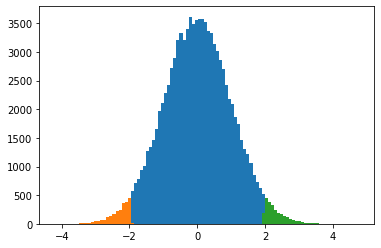

In [15]:
# We will take a sample of 3000 points from a Gaussian distribution with mu=100.0 and sigma=10.0, 
# and each time we do this, we will calculate xbar.  Then, we will calculate the z value corresponding 
# to that value of xbar.   Finally, we will create a histogram of these z-values.

xbararray = []

# perform the experiment 100000 times
for i in range(100000):
    x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)
    xbararray.append(np.mean(x))
    
xbararray = np.array(xbararray)
zscorearray = (xbararray-mu)/sem
        
zlow = zscorearray[(zscorearray<zLower)]
zhigh = zscorearray[(zscorearray>zUpper)]

bins=np.histogram(np.hstack((zscorearray,zlow,zhigh)), bins=nbins)[1] #get the bin edges

plt.hist(zscorearray,bins)
plt.hist(zlow,bins)
plt.hist(zhigh,bins)

Case 2:  

We assume that we are sampling from a population that is consistent with our expected value of $\mu$. In this instance, there is a probability $\alpha$ that we will measure a value of $z$ that is lower
than some critical value.

The critical z value will be described the the following equations:

$\int_{-\infty}^{z_{critical}} P(z) dz = \alpha $

Critical Z value:  -1.6448536269514729
Critical Xbar value:  96.99692188241497


(array([  2.,   1.,   2.,   1.,   2.,   5.,   3.,   5.,   9.,  14.,  21.,
         20.,  35.,  54.,  48.,  69.,  72., 118., 144., 178., 229., 248.,
        365., 379., 459., 570., 719., 784., 474.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([-4.20800875, -4.11817262, -4.0283365 , -3.93850038, -3.84866426,
        -3.75882814, -3.66899201, -3.57915589, -3.48931977, -3.39948365,
        -3.30964753, -3.21981141, -3.12997528, -3.04013916, -2.95030304,
        -2.86046692, -2.7706308 , -2.68079467, -2.59095855, -2.50112243,
        -2.41128631, -2.32

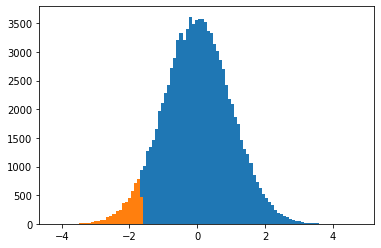

In [16]:
zCritical = stats.norm.ppf(alpha)

print ("Critical Z value: ",zCritical)

# calculate the critical lower xbar value, based on this z value

xbarLower = mu + zCritical*sem

print ("Critical Xbar value: ",xbarLower)

zlow = zscorearray[(zscorearray<zCritical)]

bins=np.histogram(np.hstack((zscorearray,zlow)), bins=nbins)[1] #get the bin edges

plt.hist(zscorearray,bins)
plt.hist(zlow,bins)

Case 3:  

We assume that we are sampling from a population that is consistent with our expected value of $\mu$. In this instance, there is a probability $\alpha$ that we will measure a value of $z$ that is higher
than some critical value.

The critical z value will be described the the following equations:

$\int_{-\infty}^{z_{critical}} P(z) dz = 1-\alpha $

Critical Z value:  1.6448536269514722
Critical Xbar value:  103.00307811758503


(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 739.,
        735., 632., 516., 451., 384., 331., 236., 188., 165., 138., 118.,
         85.,  65.,  50.,  43.,  31.,  21.,  13.,  13.,   7.,   9.,   3.,
          4.,   0.,   3.,   1.,   1.,   1.,   2.,   0.,   0.,   0.,   0.,
          1.]),
 array([-4.20800875, -4.11817262, -4.0283365 , -3.93850038, -3.84866426,
        -3.75882814, -3.66899201, -3.57915589, -3.48931977, -3.39948365,
        -3.30964753, -3.21981141, -3.12997528, -3.04013916, -2.95030304,
        -2.86046692, -2.7706308 , -2.68079467, -2.59095855, -2.50112243,
        -2.41128631, -2.32

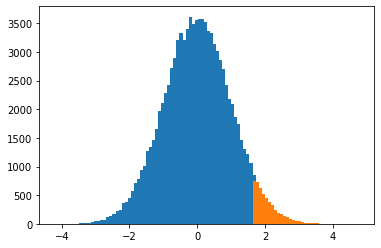

In [17]:
zCritical = stats.norm.ppf(1.0-alpha)

print ("Critical Z value: ",zCritical)

# calculate the critical upper xbar value, based on this z value

xbarUpper = mu + zCritical*sem

print ("Critical Xbar value: ",xbarUpper)

zlow = zscorearray[(zscorearray>zCritical)]

bins=np.histogram(np.hstack((zscorearray,zlow)), bins=nbins)[1] #get the bin edges

plt.hist(zscorearray,bins)
plt.hist(zlow,bins)